# Notebook to visualize Foldseek alignment scores of circular permutants

# 0. Setup


In [1]:
# Import packages
import os
import matplotlib.pyplot as plt


## 1. Generate dictionary of scores for each circular permutant of a protein of interest
### 1.1 Scores can be either TM or evalue

In [20]:

# Initialize an empty dictionary to store the data
TMscores = {}
evalues = {}
# Get the current working directory
#cwd = os.getcwd()



#!!! Enter specifc path instead of cwd
#cwd = "/nfs/home2/aidenkzj/natives/cleanup_pdbs/1zlm_cleanup_cp/foldseek_results"
#cwd = "/nfs/home2/aidenkzj/natives/cleanup_pdbs/1jbe_cleanup_cp/foldseek_results"
cwd = "/nfs/home2/aidenkzj/natives/cleanup_pdbs/1tsf_cleanup_cp/foldseek_results"
#cwd ="/nfs/home2/aidenkzj/cpdb/cleanup_pdbs/cocaine_esterase_cleanup_cp/foldseek_results"
#cwd = "/nfs/home2/aidenkzj/natives/cleanup_pdbs/1nps_cleanup_cp/foldseek_results" # Has pfam domain starting at res31
#cwd = "/nfs/home2/aidenkzj/cpdb/cleanup_pdbs/1alu_cleanup_cp/foldseek_results"
#cwd = "/nfs/home2/aidenkzj/natives/cleanup_pdbs/2gtg_cleanup_cp/foldseek_results"

# Function to extract the numeric part from the filename
def extract_number(filename):
    return int(filename.split('_')[3])

    #return int(filename.split('_')[4])
# Get the list of filenames and sort them based on the numeric part
#files = os.listdir(cwd)
#print(files)

filenames = sorted([filename for filename in os.listdir(cwd) if filename.endswith(".m8")], key=extract_number)
#print(filenames)

# Loop over each file in the sorted list
for filename in filenames:
    # Extract the filename without path or file extension
    file_basename = os.path.splitext(os.path.basename(filename))[0]
    
    # Open the file in read mode
    with open(os.path.join(cwd, filename), 'r') as file:
        # Read the first line
        first_line = file.readline().strip()  # Remove any leading/trailing whitespace
        
        # Split the first line by whitespace
        parts = first_line.split()
        #print(parts)
        # Extract the 14th element from the parts list
            # Extract the 14th element from the parts list
        if not parts:
           #TMscore = 0
           TMscore = 0.5 #adjust for 2gtg protein
           #evalue = 0
           evalue = 0.5 #adjust for 2gtg protein
        else:
           TMscore = parts[13]
           evalue = parts[11]
        
        # Add the element to the dictionary with the filename as the key
        TMscores[file_basename] = TMscore
        evalues[file_basename] = evalue

#print(evalues)

# Display the dictionary
#print("Dictionary containing 14th element from each file:")
print(TMscores)


{'1tsf_cleanup_last_0_lines_moved_to_beginning.aln1': '9.555E-01', '1tsf_cleanup_last_11_lines_moved_to_beginning.aln1': '9.436E-01', '1tsf_cleanup_last_19_lines_moved_to_beginning.aln1': '9.426E-01', '1tsf_cleanup_last_28_lines_moved_to_beginning.aln1': '9.418E-01', '1tsf_cleanup_last_35_lines_moved_to_beginning.aln1': '9.412E-01', '1tsf_cleanup_last_46_lines_moved_to_beginning.aln1': '9.402E-01', '1tsf_cleanup_last_57_lines_moved_to_beginning.aln1': '9.395E-01', '1tsf_cleanup_last_65_lines_moved_to_beginning.aln1': '9.388E-01', '1tsf_cleanup_last_73_lines_moved_to_beginning.aln1': '9.376E-01', '1tsf_cleanup_last_81_lines_moved_to_beginning.aln1': '9.368E-01', '1tsf_cleanup_last_89_lines_moved_to_beginning.aln1': '9.364E-01', '1tsf_cleanup_last_93_lines_moved_to_beginning.aln1': '9.351E-01', '1tsf_cleanup_last_102_lines_moved_to_beginning.aln1': '9.338E-01', '1tsf_cleanup_last_110_lines_moved_to_beginning.aln1': '9.324E-01', '1tsf_cleanup_last_121_lines_moved_to_beginning.aln1': '9.31

**Plot the TMscores**

['9.555E-01', '9.436E-01', '9.426E-01', '9.418E-01', '9.412E-01', '9.402E-01', '9.395E-01', '9.388E-01', '9.376E-01', '9.368E-01', '9.364E-01', '9.351E-01', '9.338E-01', '9.324E-01', '9.315E-01', '9.311E-01', '9.299E-01', '9.291E-01', '9.291E-01', '7.373E-01', '7.282E-01', '7.159E-01', '7.122E-01', '7.084E-01', '7.046E-01', '7.006E-01', '6.973E-01', '6.974E-01', '6.934E-01', '6.890E-01', '6.846E-01', '6.841E-01', '4.785E-01', '5.403E-01', '5.506E-01', '5.555E-01', '5.930E-01', '4.739E-01', '4.751E-01', '5.245E-01', '4.148E-01', '4.179E-01', '4.198E-01', '4.513E-01', '4.779E-01', '4.433E-01', '7.579E-01', '7.632E-01', '7.683E-01', '7.732E-01', '7.780E-01', '7.826E-01', '7.866E-01', '7.908E-01', '7.942E-01', '7.974E-01', '8.009E-01', '8.044E-01', '8.077E-01', '8.107E-01', '7.010E-01', '8.160E-01', '8.188E-01', '8.218E-01', '8.546E-01', '8.548E-01', '8.569E-01', '8.591E-01', '8.612E-01', '8.634E-01', '8.654E-01', '8.673E-01', '8.692E-01', '8.691E-01', '8.807E-01', '8.929E-01', '9.047E-01'

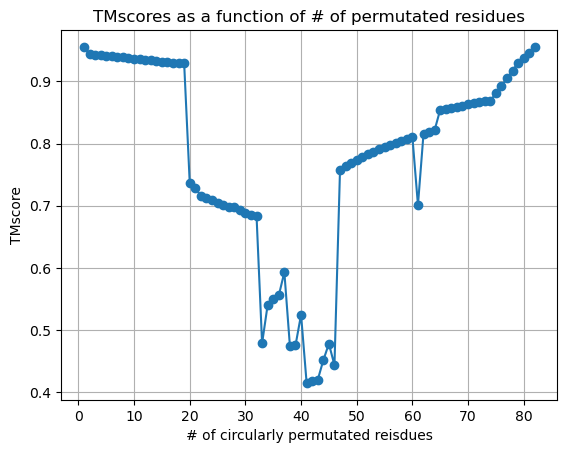

In [21]:
# Extract the values from the dictionary
tmvalues = list(TMscores.values())
float_tmvalues = list(map(float, tmvalues))
print(tmvalues)
# Plot the values
plt.plot(range(1, len(tmvalues) + 1), float_tmvalues, marker='o')  # X-axis starts from 1
plt.xlabel('# of circularly permutated reisdues')
plt.ylabel('TMscore')
plt.title('TMscores as a function of # of permutated residues')
plt.grid(True)
plt.show()

**Plot the evalues**

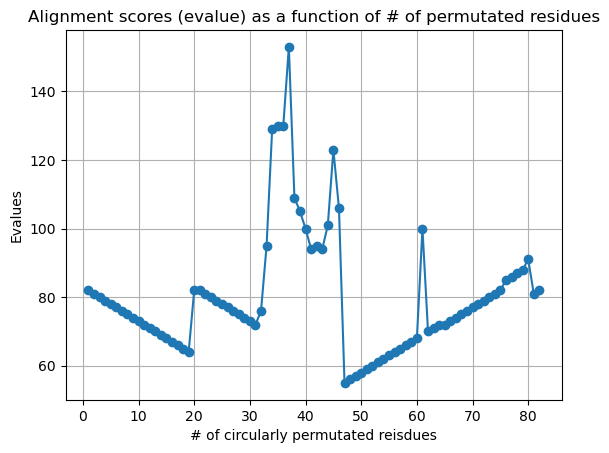

In [22]:
# Extract the values from the dictionary
evalues = list(evalues.values())
float_evalues = list(map(float, evalues))

# Plot the values
plt.plot(range(1, len(evalues) + 1), float_evalues, marker='o')  # X-axis starts from 1
plt.xlabel('# of circularly permutated reisdues')
plt.ylabel('Evalues')
plt.title('Alignment scores (evalue) as a function of # of permutated residues')
plt.grid(True)
plt.show()

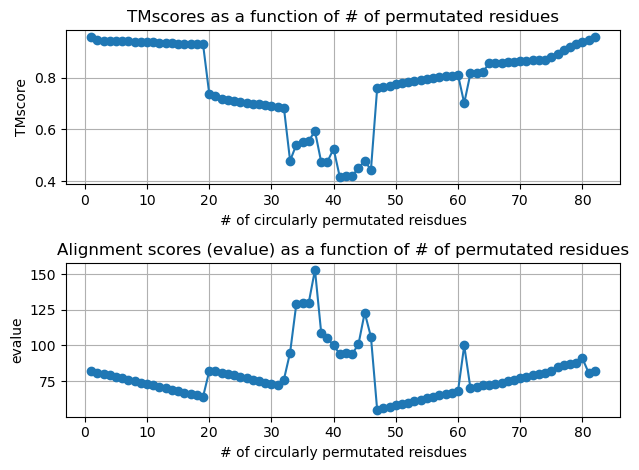

In [23]:
fig, (ax1, ax2) = plt.subplots(2)
#fig.suptitle('score subplots')
ax1.plot(range(1, len(tmvalues) + 1), float_tmvalues, marker='o')
ax1.set_xlabel('# of circularly permutated reisdues')
ax1.set_ylabel('TMscore')
ax1.set_title('TMscores as a function of # of permutated residues')
ax1.grid(True)
ax2.plot(range(1, len(evalues) + 1), float_evalues, marker='o')
ax2.set_xlabel('# of circularly permutated reisdues')
ax2.set_ylabel('evalue')
ax2.set_title('Alignment scores (evalue) as a function of # of permutated residues')
ax2.grid(True)
fig.tight_layout()

